display 자체보다는 분석, 탐색을 위해 사용됨
### 판다스 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
- 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림
- 막대그래프 : df.plot(kind='bar'), df.plot(kine='barh',stacked=True, alpha=0.8)
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x='',y='',kind='scatter'), 상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

<예 - 주사위>
확률 변수 : 1~6
확률분포 : 1/6


### matplotlib
- histogram : plt.hist(x, bins=)
- lin plot : plit.plot(x,y)
- plt.bar(x,y, width= , color=")
- scatter plot : plt.scatter(x,y):

### seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x,y,data,color)
양쪽 박스형태로 돼 있는걸 분포로 동시에 알 수 있게 한 것
- sns.barplot(x,y,data,color)
막대그래프
- sns.jointplot(x,y,data,color)
스케터플랏, 히스토그램을 종합해서 구해주는 것
- sns.pairplot(data,hue,palette)
여러개 그리면 동시에 나오는 것
- sns.lmplot(x,y,data,color)
선형 회귀를 그려주는 그림
- sns.regplot(x,y,data,fig_reg=False)
선형 회귀를 그려주지만 살짝 다름

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/joy/cakd3/visualization/dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df['new_Date'] = pd.to_datetime(df['Date'])
df1 = df.set_index('new_Date')
df1.drop(['Date','Volume'],axis=1, inplace=True)


<AxesSubplot:xlabel='new_Date'>

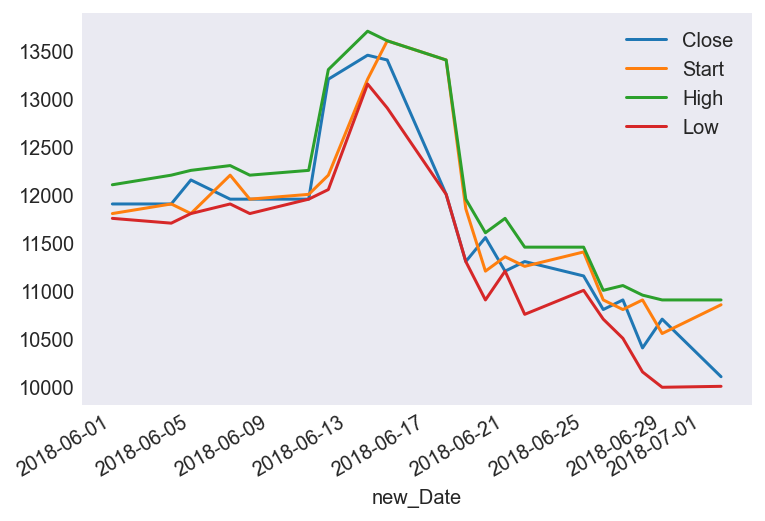

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'

# 선그래프
df1.plot()


<AxesSubplot:>

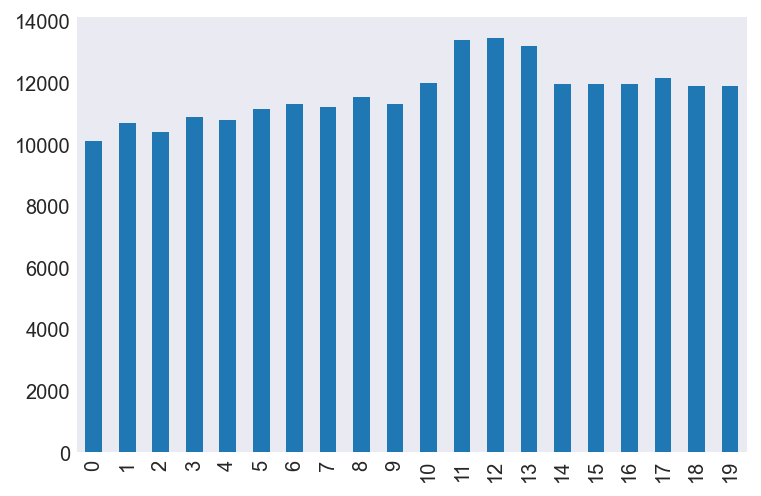

In [59]:
# 막대 그래프
df.Close.plot(kind='bar')

<AxesSubplot:xlabel='new_Date'>

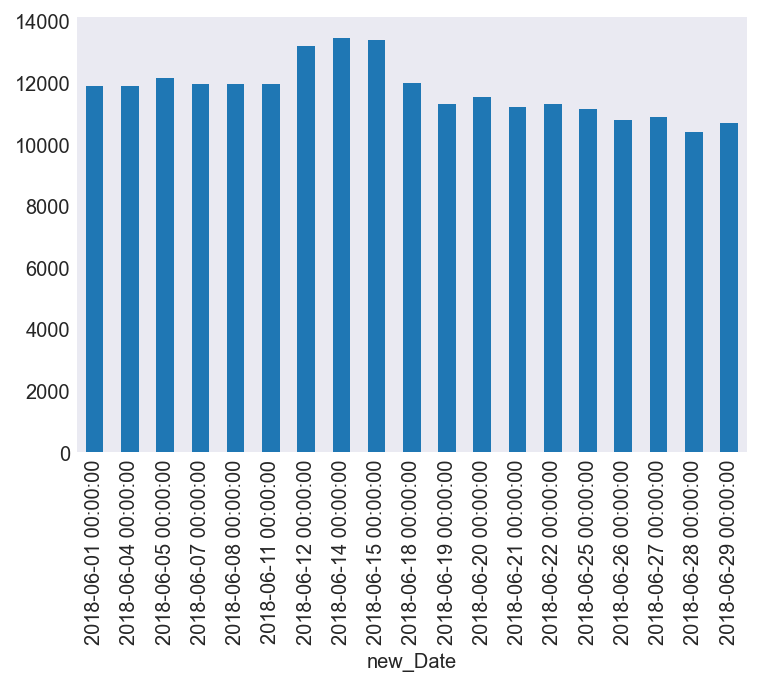

In [60]:
# Q.6월만을 추출하여 close 칼럼으로 일별 막대 그래프를 표현하세요.
df1.Close.loc['2018-06'][::-1].plot(kind='bar')

In [61]:
df1.Close.value_counts().sort_index()

10100    1
10400    1
10700    1
10800    1
10900    1
11150    1
11200    1
11300    2
11550    1
11900    2
11950    3
12000    1
12150    1
13200    1
13400    1
13450    1
Name: Close, dtype: int64

<AxesSubplot:ylabel='Frequency'>

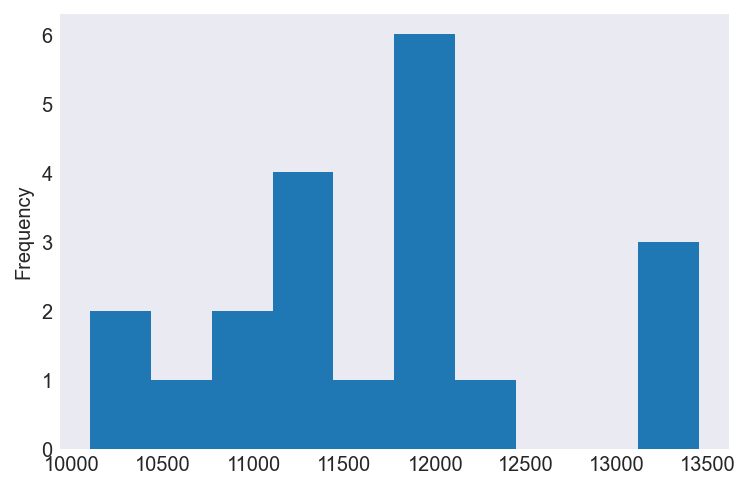

In [54]:
df1.Close.plot(kind='hist', bins=10)

In [63]:
df.Volume.value_counts().sort_index()

25171     1
32062     1
42485     1
49088     1
55519     1
59258     1
62293     1
63039     1
133002    1
133548    1
134805    1
137977    1
155769    1
170253    1
180656    1
201376    1
308596    1
309787    1
347451    1
558148    1
Name: Volume, dtype: int64

<AxesSubplot:ylabel='Frequency'>

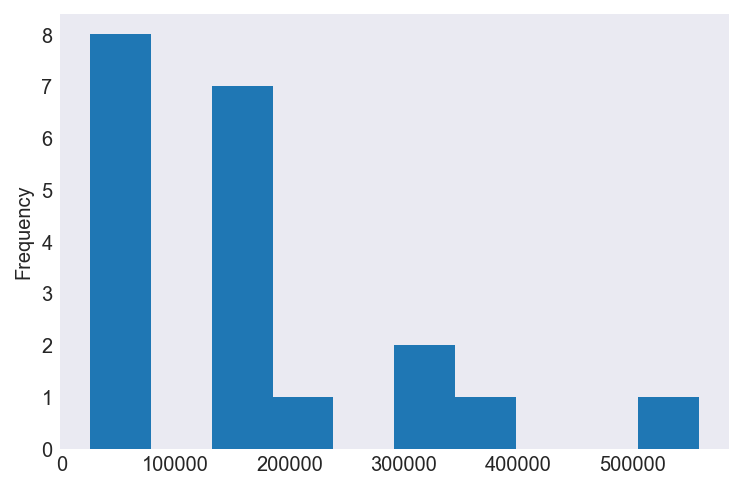

In [66]:
# Q. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.
df.Volume.plot(kind='hist', bins=10)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

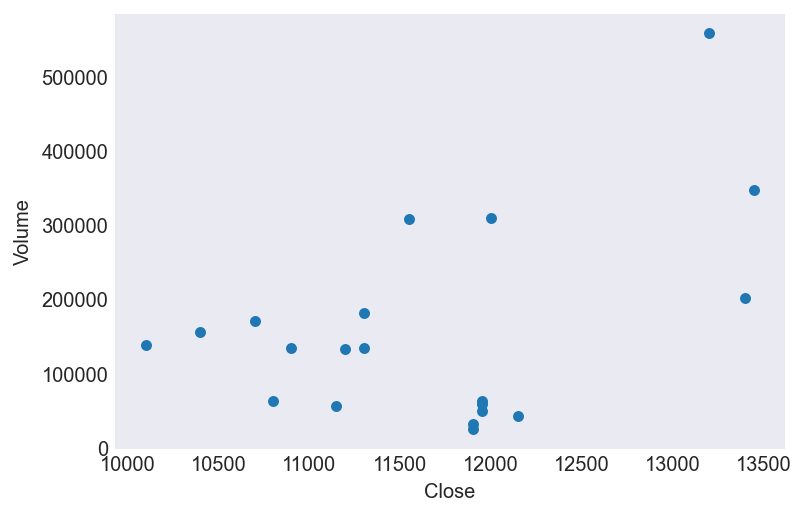

In [68]:
# Q. Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요
df.plot(x='Close',y='Volume',kind='scatter')

In [70]:
df.corr()

,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


<AxesSubplot:>

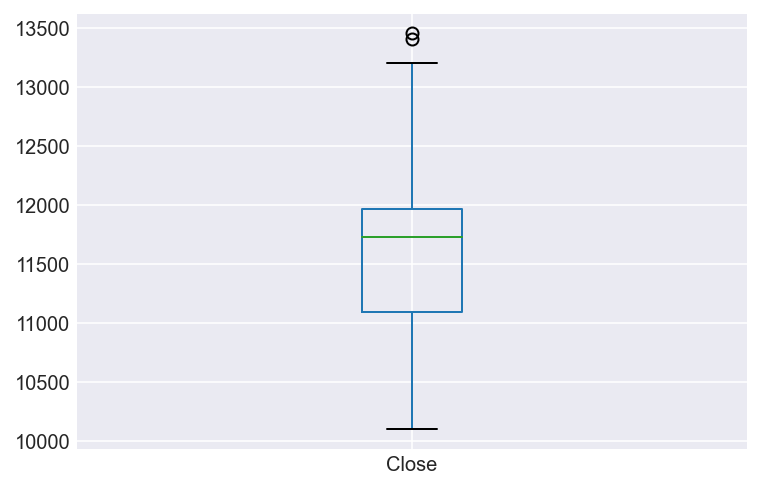

In [73]:
# Q. Close 칼럼의 Box Plot을 표현하세요
# df.Close.plot(kind='box')
df.boxplot(column = ['Close'])

In [72]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

iqr = 75%-25%  
upper = 75% + iqr*1.5 이상이면 이상치  
lower = 25% - iqr*1.5 보다 작으면 이상치  

### Box plot 의미 해석
- 중앙값
- IQR(Inter Quartile Range) : 제 3사분위수 - 제1사분위수
- lower whisker : Q1 - 1.5*IQR 이내인 값 중에서 최솟값
- upper whisker : Q3 + 1.5*IQR 이내인 값중에서 최댓값
- 이상치 : lower whisker, upper whisker을 벗어나는 값

In [93]:
# Q.Close 칼럼의 이상치를 구하세요
print(df.Close.describe(),'\n')

# 1
IQR = 11962.5 - 11087.5
LW = 11087.5 - 1.5*IQR
UW = 11962.5 + 1.5*IQR

print('lower whisker: ', LW)
print('upper whisker: ', UW,'\n')

IV = df.Close[(df['Close']<LW)|(df['Close']>UW)]
print('이상치: ','\n',IV)

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64 

lower whisker:  9775.0
upper whisker:  13275.0 

이상치:  
 11    13400
12    13450
Name: Close, dtype: int64


In [95]:
# 조현정님
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
print(Q1,Q3)
IQR = Q3 - Q1
abv = df[(df['Close']<=(Q1-IQR*1.5))|(df['Close']>=(Q3+IQR*1.5))]
abv

11087.5 11962.5


,Date,Close,Start,High,Low,Volume,new_Date
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [96]:
# 이민찬님
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df.Close:
    if not Q1 - IQR*1.5 < i < Q3 + IQR*1.5:
        outlier.append(i)
print(outlier)

[13400, 13450]


In [97]:
# 과제
# Q.Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
df_ep = pd.read_excel('/Users/joy/cakd3/visualization/dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


<AxesSubplot:xlabel='year'>

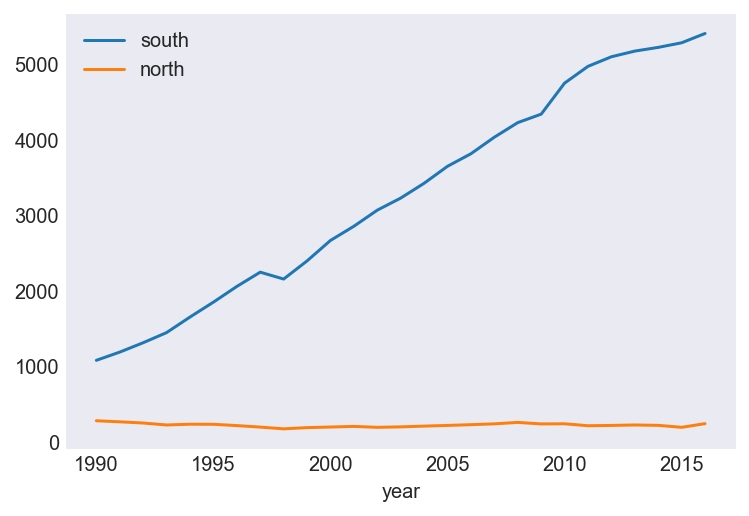

In [98]:
df_ep.set_index('year',inplace=True)
df_ep.plot()

In [99]:
# 과제
# Q. 남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술 하세요.

In [101]:
import pandas as pd
df_auto = pd.read_excel('/Users/joy/cakd3/visualization/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [102]:
# 과제
# mpg 컬럼의 이상치를 구하세요.
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


[과제] 통계학의 기초 개념을 설명하세요.
1. 모수의 개념 및 사례
2. 통계의 개념 및 사례
3. 확률변수, 확률, 확률분포
4. 도수, 도수분표, 상대도수
5. 평균값, 기대값, 분산, 표준편차
6. 확률질량함수, 확률밀도함수
7. 정규분포, 이항분포, 포아송분포
8. 표본분산(n), 불편분산(n-1)
9. 기술통계, 추측통계
10. 가설과 검증

In [107]:
import pandas as pd
df_auto = pd.read_excel('/Users/joy/cakd3/visualization/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [109]:
df_auto.horsepower.replace('?',np.nan, inplace=True)
#0이 int니까 다 int로 바뀜 / np.nan 으로 바꾸면 float으로 바뀜
df_auto.info()
df_auto.horsepower.fillna(df_auto.horsepower.mean(), inplace=True)
df_auto.info() #평균으로 null 값 채워줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float6

In [5]:
import pandas as pd
fish_multi = pd.read_csv('/Users/joy/cakd3/visualization/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:>

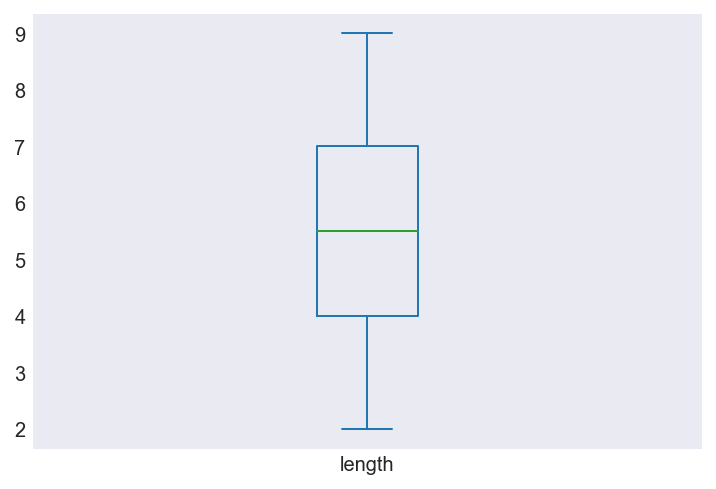

In [112]:
fish_multi.plot(kind='box')

<AxesSubplot:>

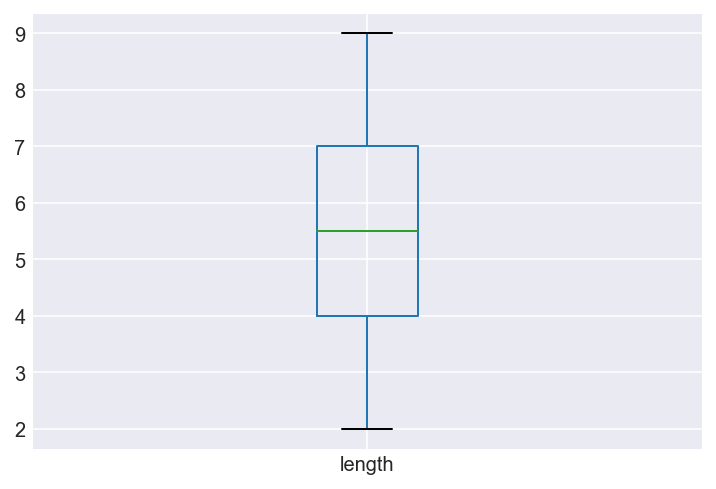

In [6]:
fish_multi.boxplot()

<AxesSubplot:xlabel='species', ylabel='length'>

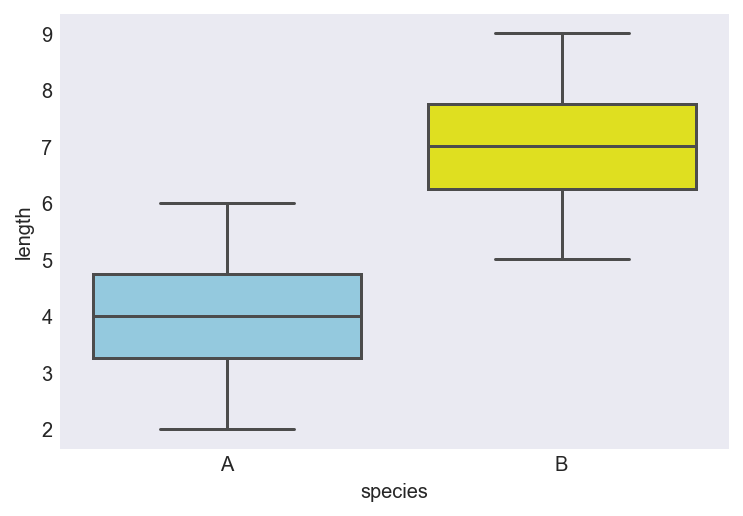

In [117]:
import seaborn as sns
sns.boxplot(x='species',y='length', data=fish_multi, palette = ('skyblue','yellow')) #, color='skyblue'

In [118]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [120]:
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,10
6,A,4
7,A,5
8,A,5
9,A,6


In [119]:
fish_multi.iloc[5,1] = 10 
fish_multi.iloc[10,1] = 2
fish_multi.groupby('species').describe()

length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0

In [ ]:
# 과제
# Q. A,B 그룹의 Box Plot을 그리고 이상치를 구하세요.

          Num
0  417.022005
1  720.324493
2    0.114375
3  302.332573
4  146.755891
                Num
count  10000.000000
mean     497.996436
std      287.707572
min        0.096951
25%      246.093557
50%      501.004488
75%      745.216077
max      999.875788


<AxesSubplot:ylabel='Frequency'>

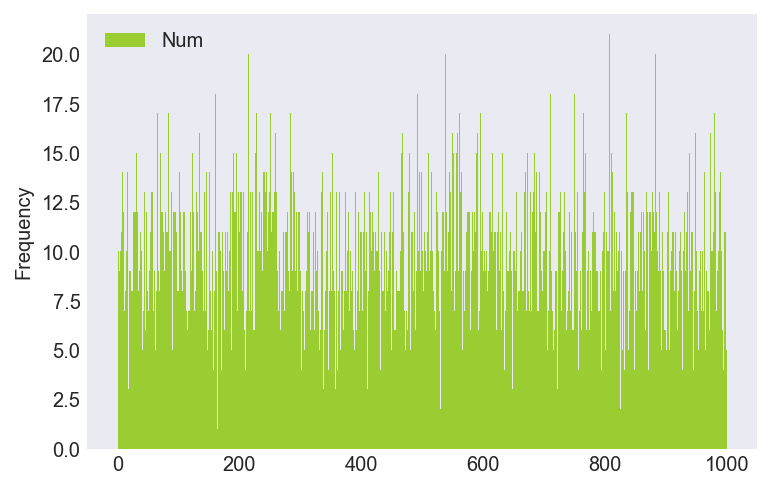

In [8]:
# 0부터 1000사이의 균일분포를 이루는 난수 생성
np.random.seed(1)
data = np.random.rand(10000)*1000  #rand는 0-10사이 균일분포 난수를 만들어줌
data[:10]

df = pd.DataFrame(data, columns=['Num'])
print(df.head())
print(df.describe())

df.plot(kind='hist', bins=1000, color='yellowgreen')

        Num
0 -0.416758
1 -0.056267
2 -2.136196
3  1.640271
4 -1.793436
                Num
count  10000.000000
mean      -0.019192
std        1.000467
min       -3.582359
25%       -0.688269
50%       -0.020273
75%        0.641505
max        4.133362


<AxesSubplot:ylabel='Frequency'>

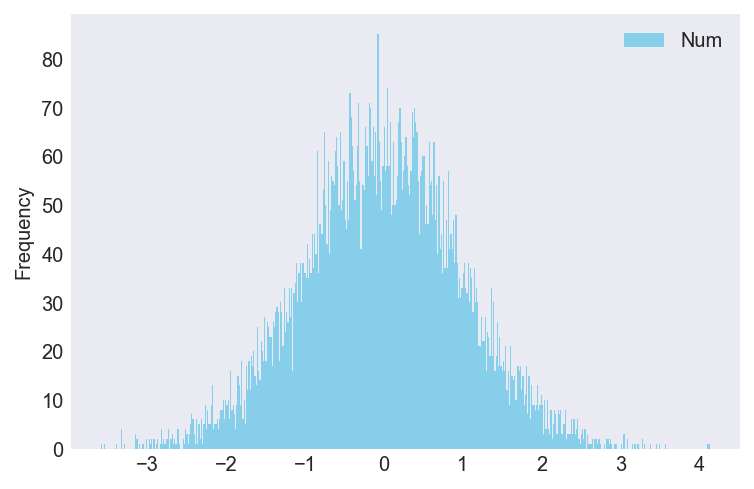

In [152]:
import numpy as np
np.random.seed(2)
data2 = np.random.randn(10000)

df2 = pd.DataFrame(data2, columns=['Num'])
print(df2.head())
print(df2.describe())

df2.plot(kind='hist',bins=500, color='skyblue')

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698


<AxesSubplot:ylabel='Frequency'>

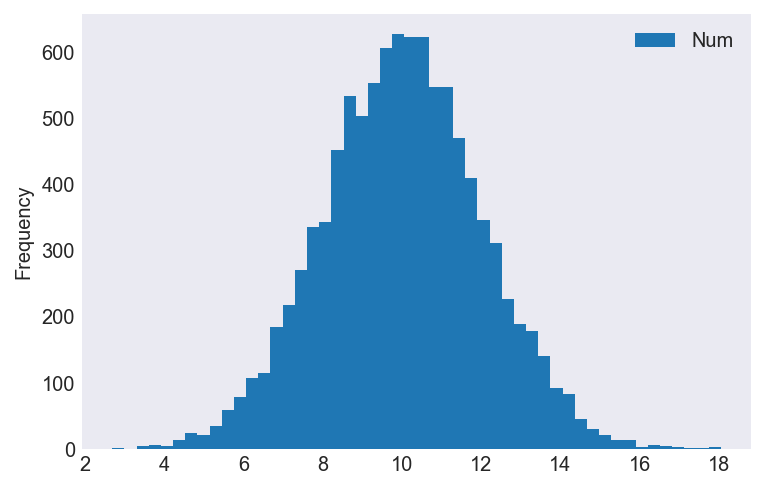

In [155]:
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10,scale=2, size=10000) #평균 10, 표준편차 2, 샘플수 만개
df1  = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
print(df1.describe())
df1.plot(kind='hist', bins=50)

<AxesSubplot:>

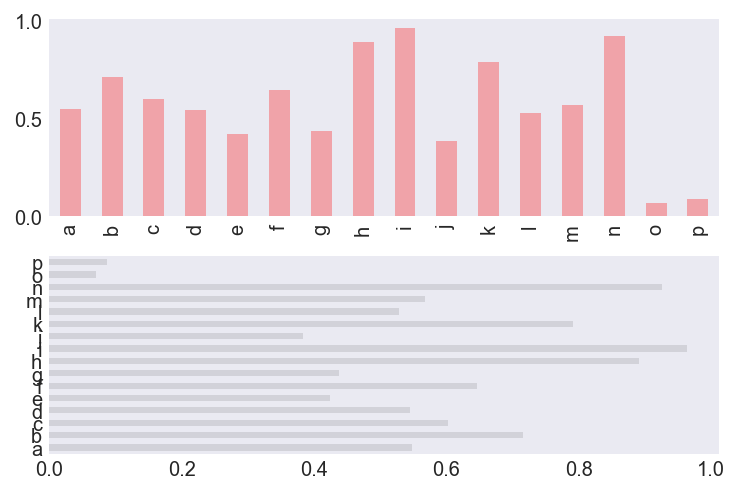

In [12]:
import matplotlib.pyplot as plt
np.random.seed(0)
fig,axes = plt.subplots(2,1)  #그래프를 2행 1열로 그린다는 뜻
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='r', alpha=0.3)
data.plot.barh(ax=axes[1], color='k', alpha=0.1)


In [174]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=['A','B','C','D'])
print(df)

              A         B         C         D
one    0.282807  0.120197  0.296140  0.118728
two    0.317983  0.414263  0.064147  0.692472
three  0.566601  0.265389  0.523248  0.093941
four   0.575946  0.929296  0.318569  0.667410
five   0.131798  0.716327  0.289406  0.183191
six    0.586513  0.020108  0.828940  0.004695


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


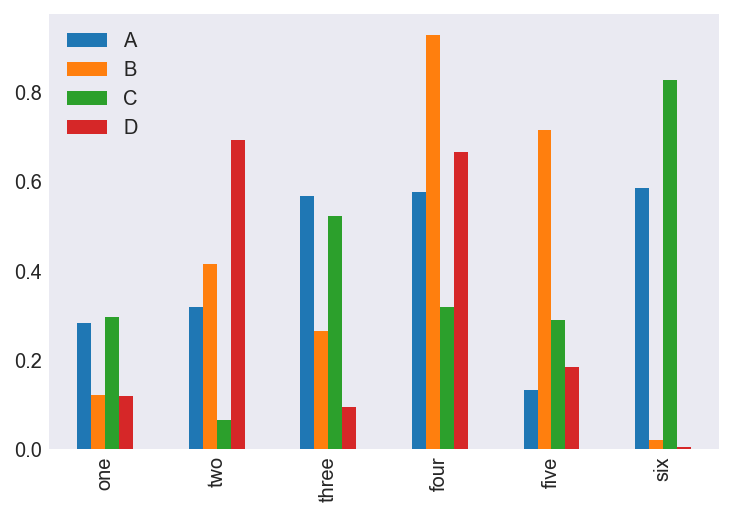

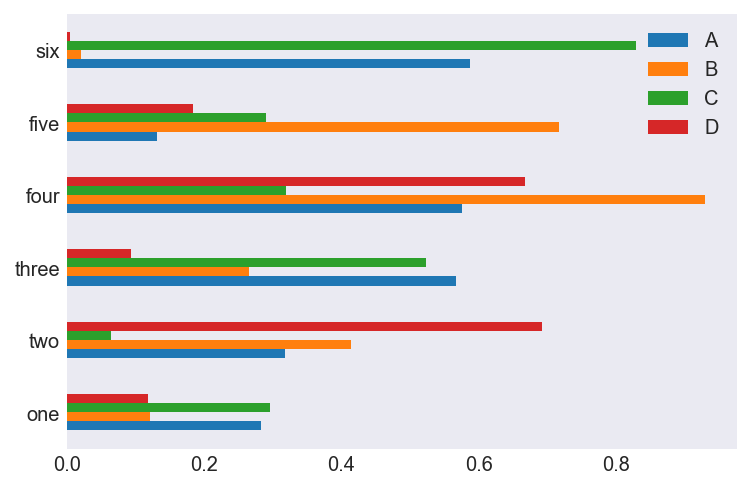

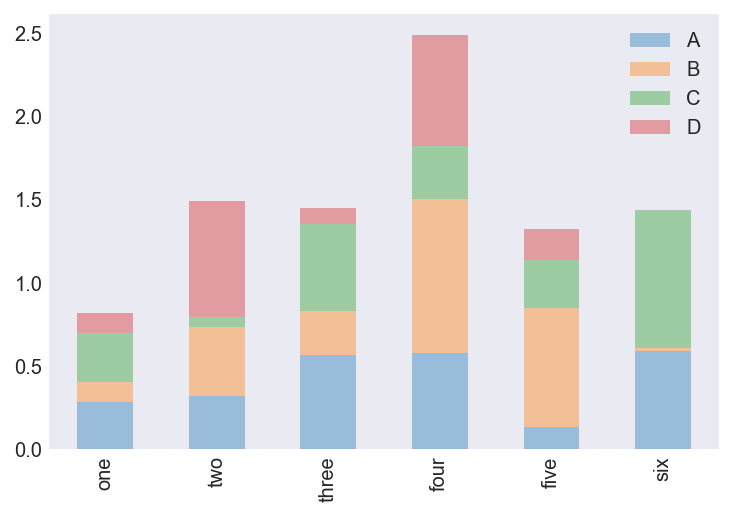

In [186]:
print(df.plot(kind='bar'))
print(df.plot(kind='barh'))
print(df.plot(kind='bar',stacked=True, alpha=0.4)) #누적그래프

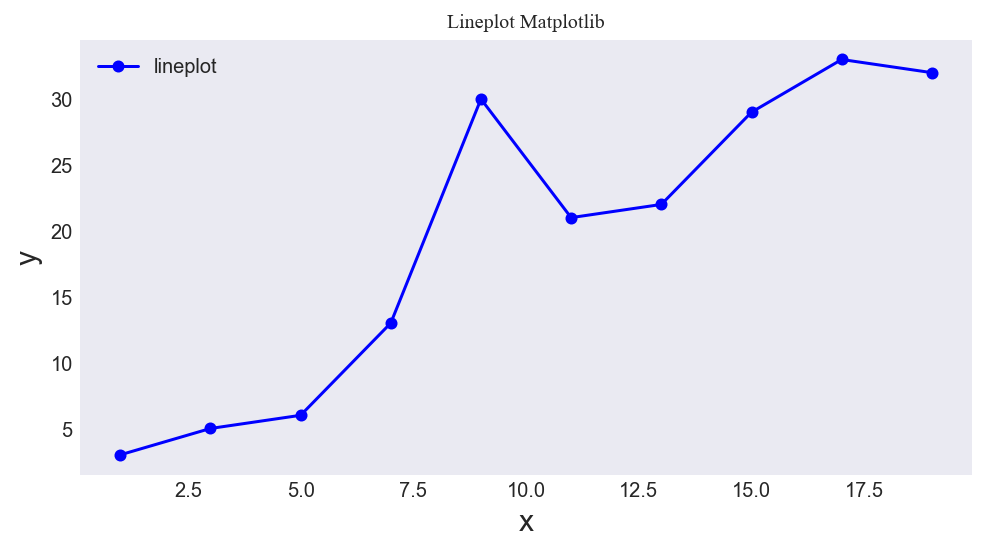

In [215]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(8,4))  # 가로X세로 사이즈
plt.plot(x,y,color='blue',marker='o', markersize=5)
plt.title('Lineplot Matplotlib', size=30, font='Times New Roman')
plt.xlabel('x', size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])

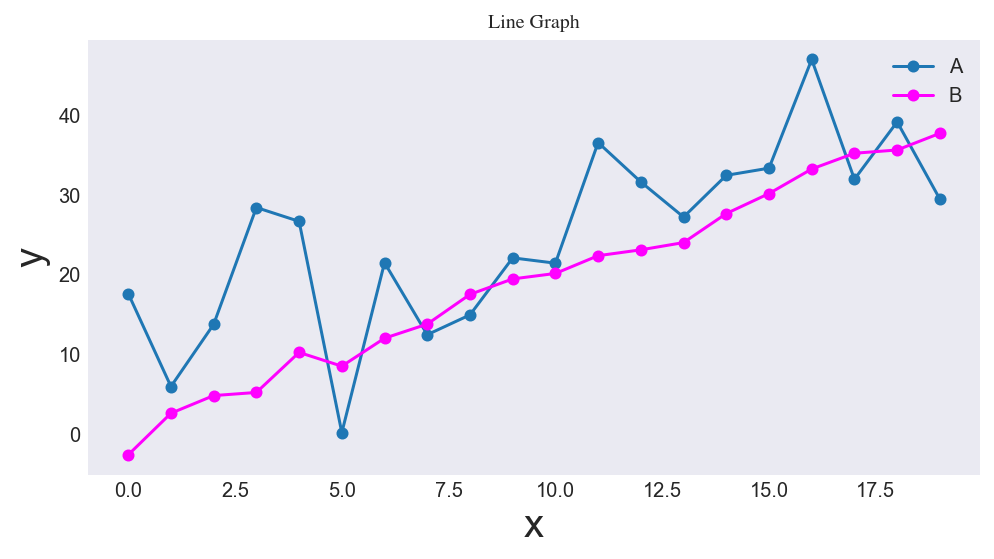

In [227]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(8,4))
plt.plot(x,y1, marker='o', markersize=5)
plt.plot(x,y2,color='magenta', marker='o', markersize=5)
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.title('Line Graph',size=20, font='Times')
plt.legend(['A','B'])

range(0, 10)
[3 7 3 5 2 9 7 8 2 3]


Text(0.5, 0, 'x')

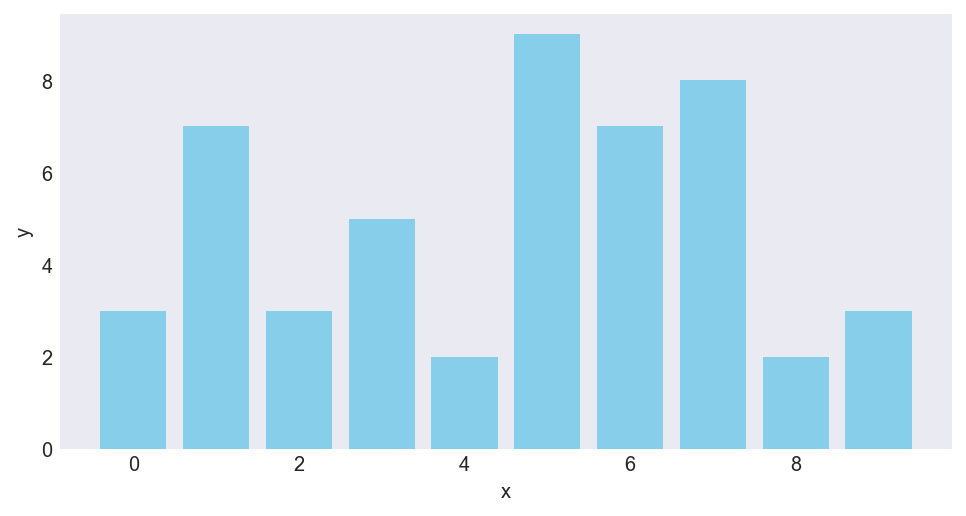

In [231]:
# 막대그래프 - 과제로 데코레이션 하기 
y = np.random.randint(2,10,size=10)
x = range(len(y)) #len(y)=10 이어서, 0부터 9까지가 됨
print(x)
print(y)

plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8, color='skyblue')
plt.ylabel('y')
plt.xlabel('x')

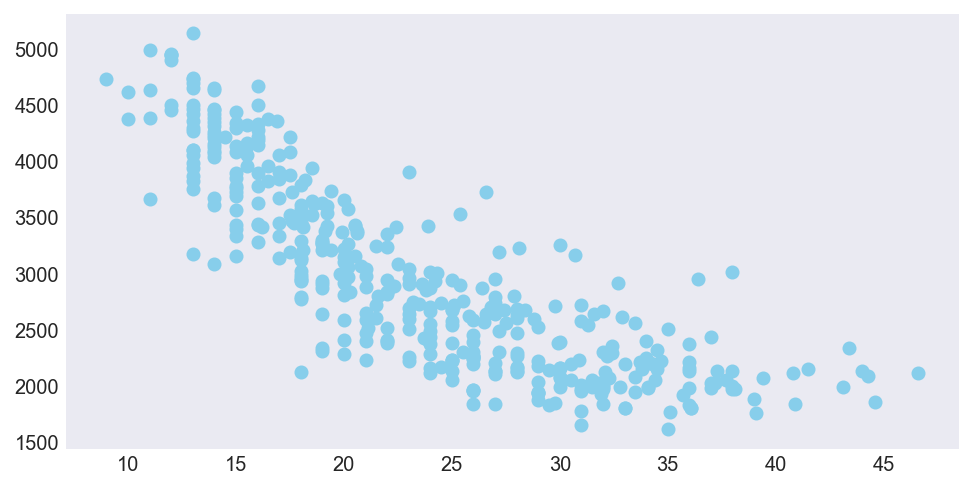

In [237]:
# scatter plot
df_auto = pd.read_excel('/Users/joy/cakd3/visualization/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,4))
plt.scatter(x,y,color='skyblue')

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

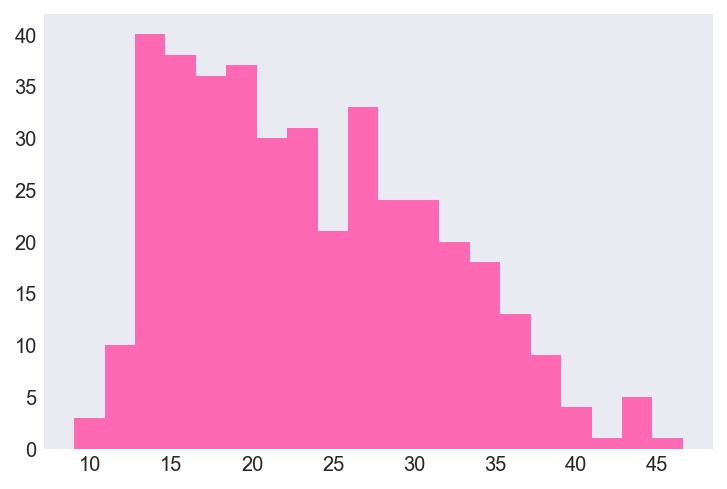

In [245]:
# histogram
plt.hist(df_auto.mpg, bins=20, color='hotpink')

<BarContainer object of 10 artists>

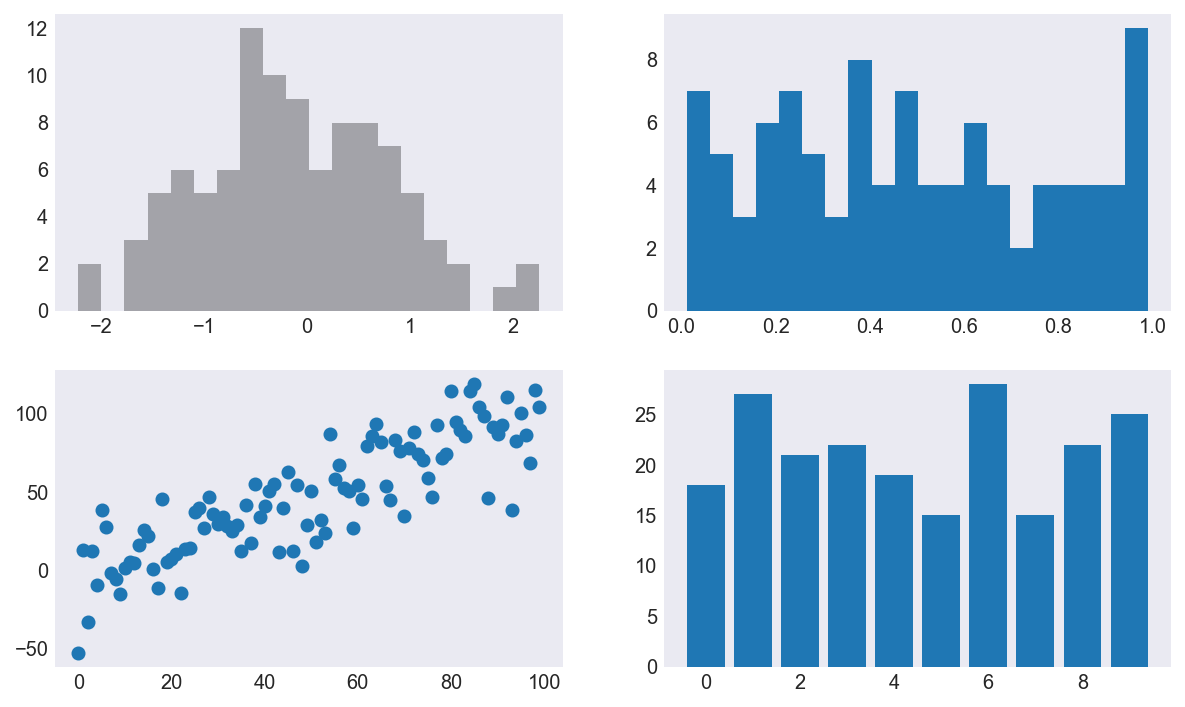

In [248]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.hist(np.random.rand(100), bins = 20)
ax3.scatter(x = np.arange(100), y = np.arange(100) + np.random.randn(100)*20)
ax4.bar(np.arange(10),np.random.randint(15,30, 10))

(array([2.00000e+00, 1.20000e+01, 2.20000e+01, 4.30000e+01, 1.41000e+02,
        3.42000e+02, 7.25000e+02, 1.43000e+03, 3.03500e+03, 5.89600e+03,
        1.11980e+04, 1.95690e+04, 3.43560e+04, 5.69240e+04, 8.95800e+04,
        1.35179e+05, 1.95464e+05, 2.71857e+05, 3.62395e+05, 4.60748e+05,
        5.64471e+05, 6.60880e+05, 7.42629e+05, 7.98110e+05, 8.22389e+05,
        8.11601e+05, 7.70049e+05, 6.98267e+05, 6.06291e+05, 5.05098e+05,
        4.02293e+05, 3.08787e+05, 2.26617e+05, 1.59017e+05, 1.07292e+05,
        6.93250e+04, 4.25810e+04, 2.51560e+04, 1.43950e+04, 7.94100e+03,
        4.08700e+03, 2.06100e+03, 1.00300e+03, 4.33000e+02, 1.75000e+02,
        8.50000e+01, 3.30000e+01, 9.00000e+00, 4.00000e+00, 3.00000e+00]),
 array([-5.11196097, -4.9051105 , -4.69826004, -4.49140957, -4.28455911,
        -4.07770864, -3.87085818, -3.66400771, -3.45715725, -3.25030678,
        -3.04345632, -2.83660585, -2.62975539, -2.42290492, -2.21605446,
        -2.00920399, -1.80235353, -1.59550306, -1

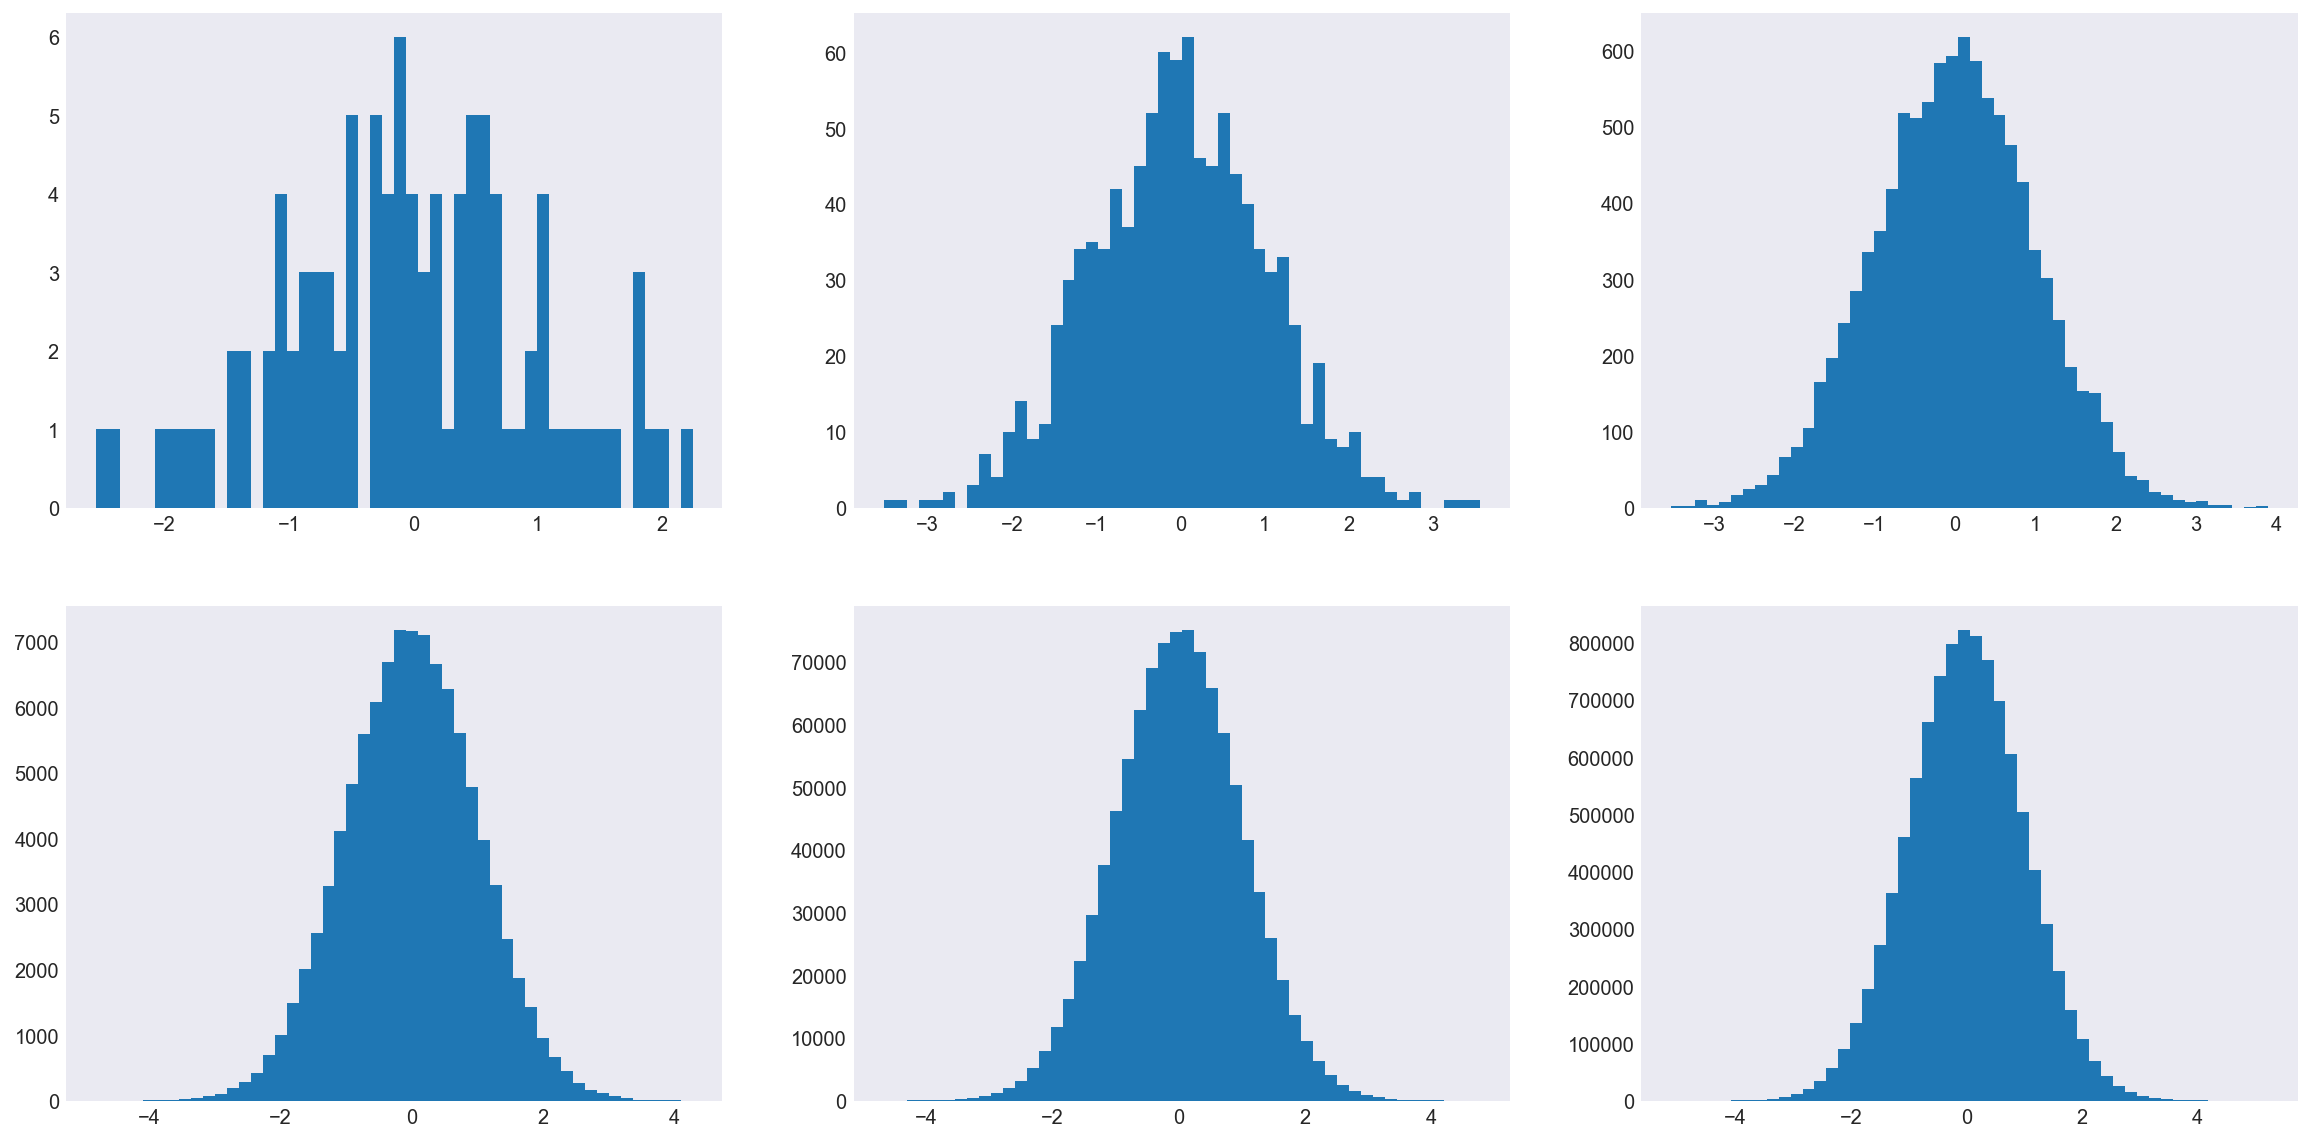

In [251]:
# 과제
# Q. 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.
fig, axes= plt.subplots(2,3,figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)
#샘플이 늘어남에 따라서 점점 표준정규분포에 가까워짐

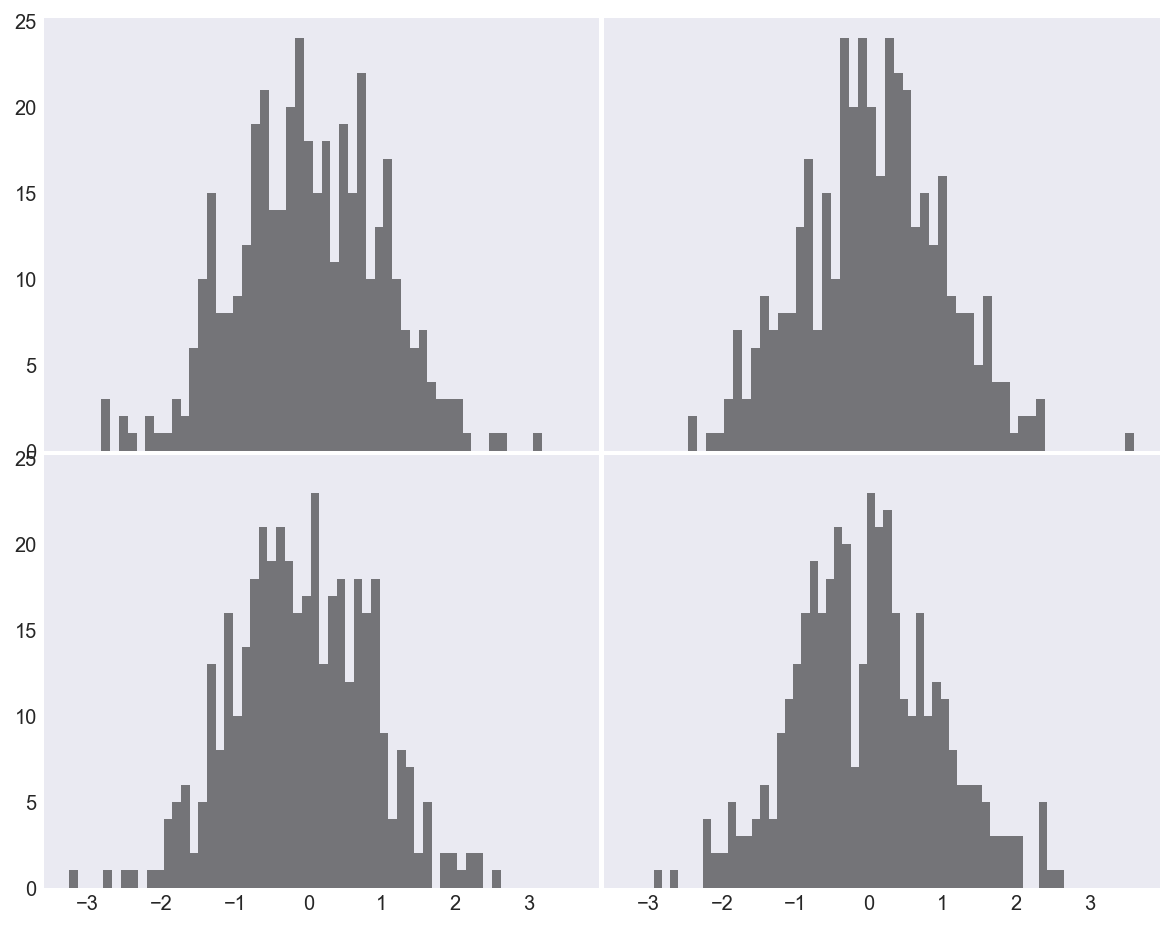

In [256]:
fig,axes=plt.subplots(2,2, figsize=(10,8), sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(400), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [257]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


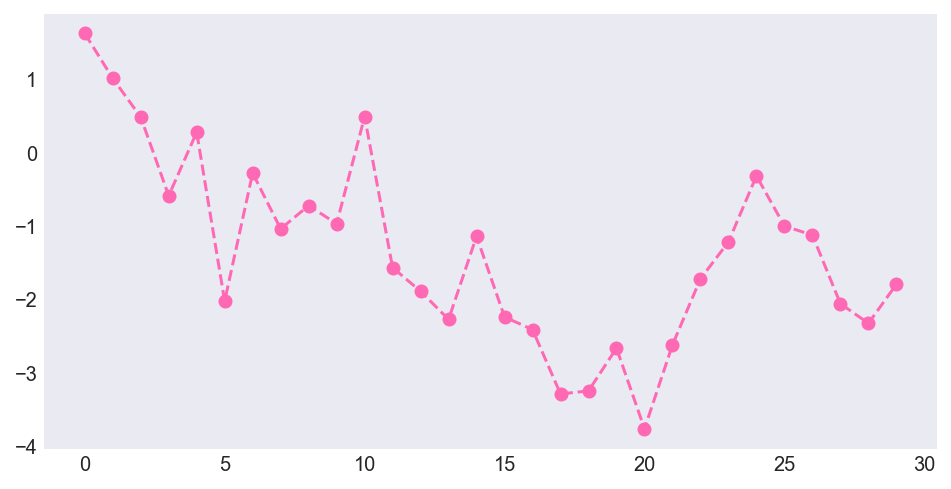

In [262]:
# 색상, 마커, 선 스타일
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(8,4))
plt.plot(randn(30).cumsum(), linestyle='dashed', color='hotpink', marker='o')

In [263]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [265]:
# 과제
# Q. 시각화 탐색을 통해 df의 각 칼럼에 대한 인사이트를 기술하세요(5개이상)
# - 의미없는 변수 제거
# - 종속변수인 survived와 독립변수간의 상관관계
# - 독립변수간 상관관계
# - 분석에 의미있는 파생변수 도출

In [288]:
np.random.seed(0)
data=np.random.randn(1000)
cdata=data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

Text(0, 0.5, 'Sum')

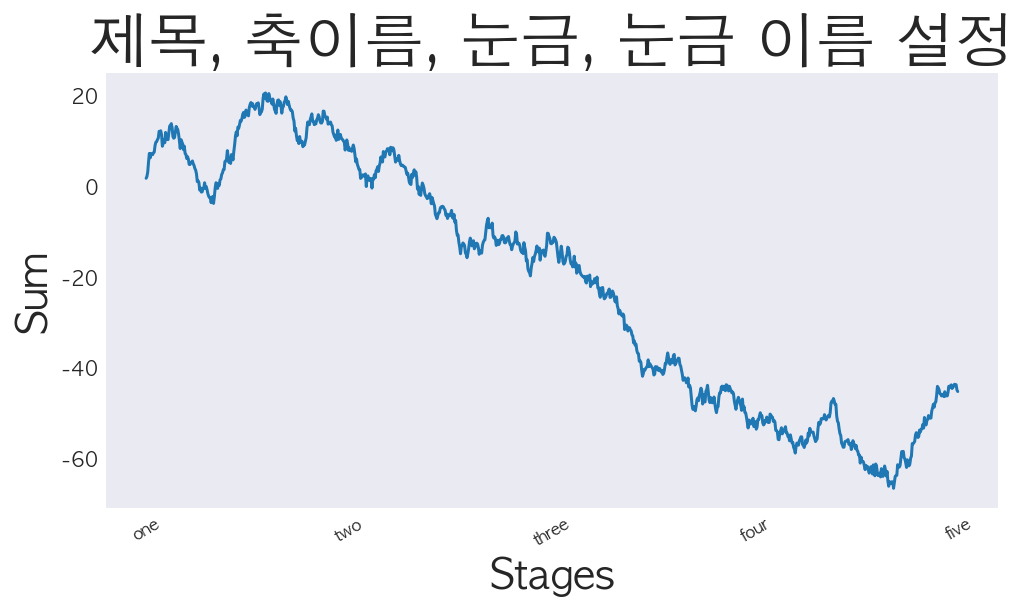

In [290]:
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='AppleGothic') #한글폰트설정
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks=ax.set_xticks([0,250,500,750,1000])
labels=ax.set_xticklabels(['one','two','three','four','five'],
                         rotation=30, fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=30)
ax.set_xlabel('Stages', size=20)
ax.set_ylabel('Sum', size=20)

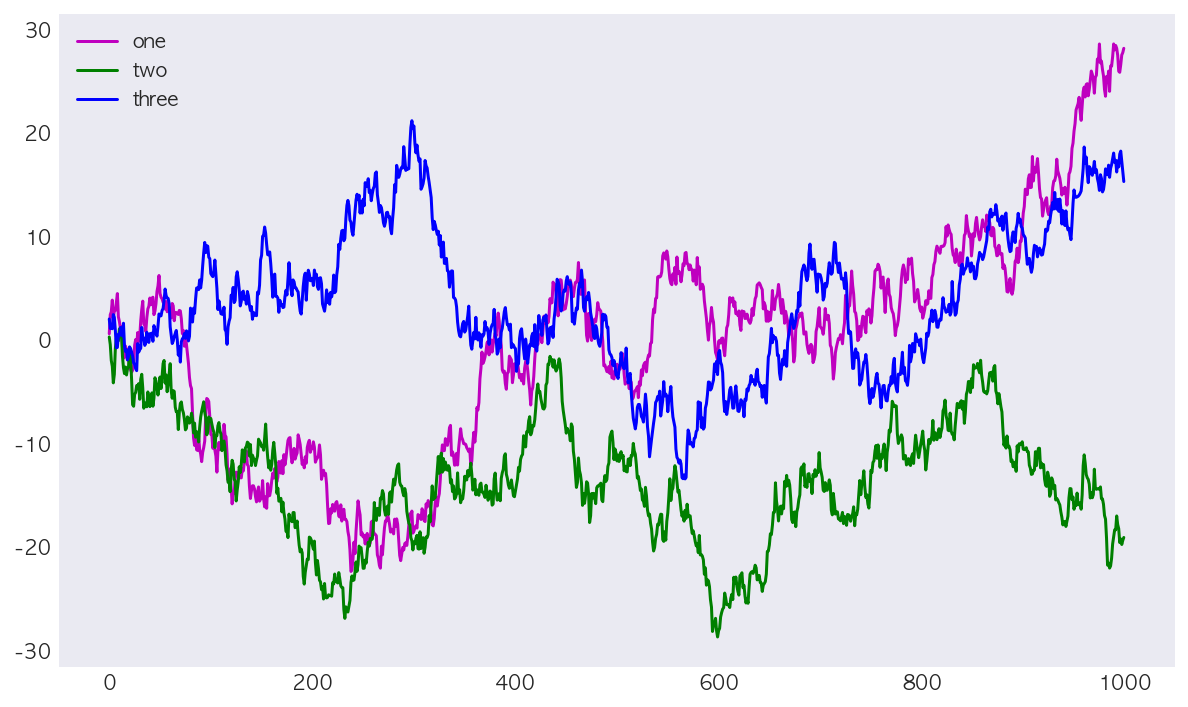

In [292]:
from numpy.random import randn
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m', label='one') #'m'은 color='magenta'라는 뜻
ax.plot(randn(1000).cumsum(),'g', label='two')
ax.plot(randn(1000).cumsum(),'b', label='three')

plt.legend(loc='best') #범례의 위치를 가장 적절한 위치에 찾아서 넣으라는 뜻

In [293]:
def get_age_cat(age):
    cat = ''
    if age < 15 : cat = 'young'
    elif age < 30 : cat = 'teen'
    elif age < 35 : cat = 'adult'
    elif age < 50 : cat = 'mature'
    else : cat='elder'
    return cat
df['age_cat']=df['age'].apply(lambda x : get_age_cat(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,mature
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,mature
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,mature


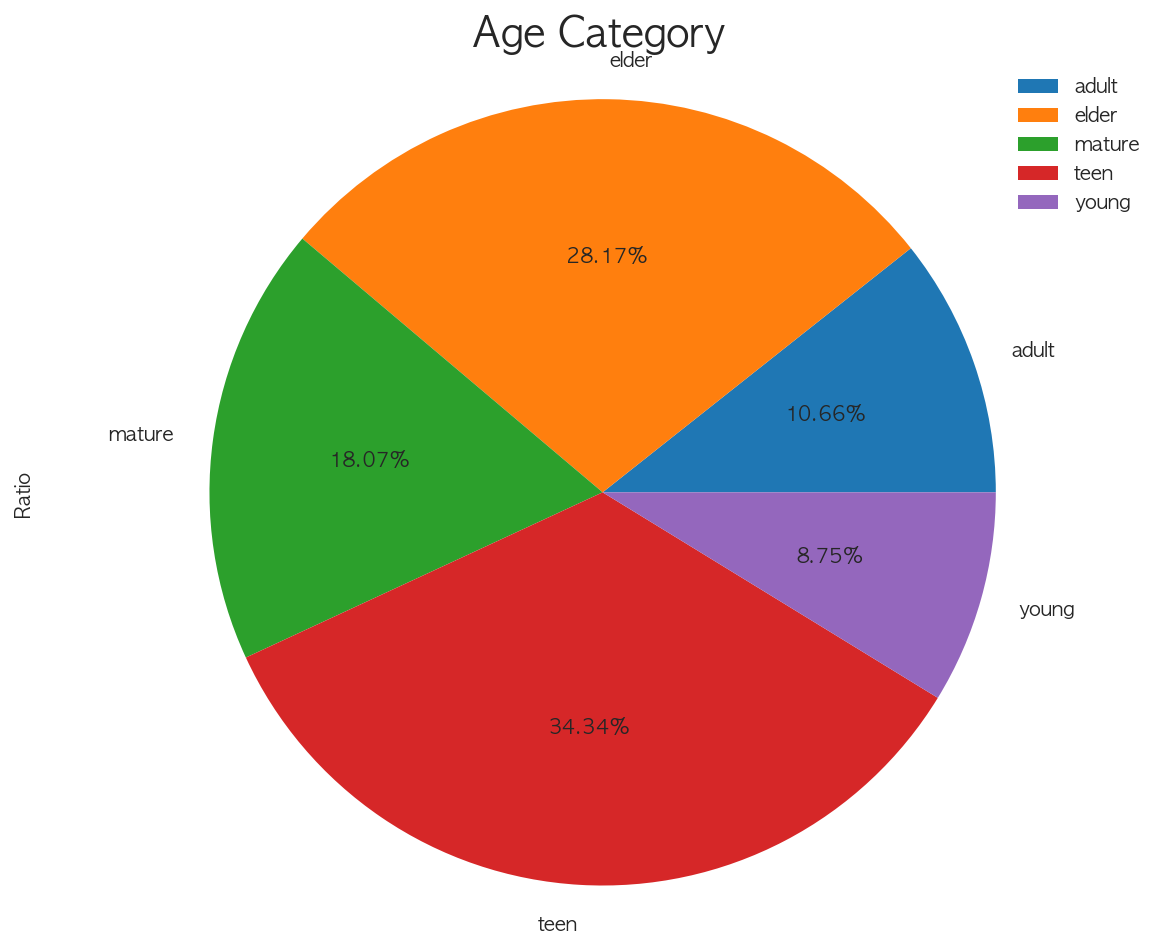

In [299]:
df['Ratio'] = 1
df_age_cat = df.groupby('age_cat').sum()
df_age_cat
df_age_cat.Ratio.plot(kind='pie',
                     figsize=(10,8),
                     autopct = '%.2f%%',
                     startangle=0)
plt.title('Age Category', size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index, loc='best')

line : 변화를 보기 위한 그래프로 많이 씀. 시간에 따른 변화 (multi_line : 시간에 따라서 두 값을 비교할 수 있음.)

bar : x값 각각의 y값의 변화. stacked으로 누적으로도 볼 수 있음 (한달간의 공부시간양. 전체 총량과 비교 가능.)
      (stacked을 쓰면 여러가지 속성을 한번에 볼 수 있음. (ex: 20210727의 공부시간, 자습시간, 쉬는시간 속성을 비교 확인 가능)
      
scatter : 두 변수의 관계를 볼 때 많이 씀

histogram : 도수분포표, 값이나 범위의 '빈도'가 어떤지 확인 할 수 있음. 평균을 기준으로 대칭되는 성질(도수분포표)

boxplot : 이상치 확인할때 많이 씀. 구조가 데이터의 전체를 구조적으로 보여줄 수 있으며, 이상치에 속하는 것들을 눈으로 표시하게 쉽도록 함.

pie : 분포를 확인할 때 씀